# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Descriptive statistics
### VIDEO: Data from different distributions
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
# or: from scipy import stats


이 셀은 **이론적인(analytic) 가우시안(정규) 분포**를 시각화합니다.
* `N = 1001`: x축을 얼마나 세밀하게 나눌지를 결정하는 점의 개수입니다.
* `x = np.linspace(-4,4,N)`: -4에서 4까지의 구간을 `N`개의 동일한 간격으로 나눈 배열을 생성합니다. 이는 표준 정규분포의 일반적인 x값 범위를 나타냅니다.
* `gausdist = stats.norm.pdf(x)`: `scipy.stats.norm.pdf()` 함수를 사용하여 `x` 배열의 각 값에 대한 표준 정규분포(평균 0, 표준편차 1)의 확률 밀도 함수(PDF) 값을 계산합니다.
* `plt.plot(x,gausdist)`: x값에 따른 PDF 값을 사용하여 정규분포 곡선을 그립니다.
* `plt.title(...)`: 그래프의 제목을 "Analytic Gaussian (normal) distribution"으로 설정합니다.
* `print(sum(gausdist))`: 계산된 PDF 값들의 합을 출력합니다. 이 값은 1이 아닙니다. 연속 확률 분포에서 PDF 값 자체는 확률이 아니며, PDF 곡선 아래의 전체 면적이 1이어야 합니다. 단순 합이 1이 되려면 각 PDF 값에 `dx`(x값들 사이의 간격)를 곱한 후 더해야 합니다. (예: `sum(gausdist * (x[1]-x[0]))`은 1에 가까운 값을 반환합니다.)

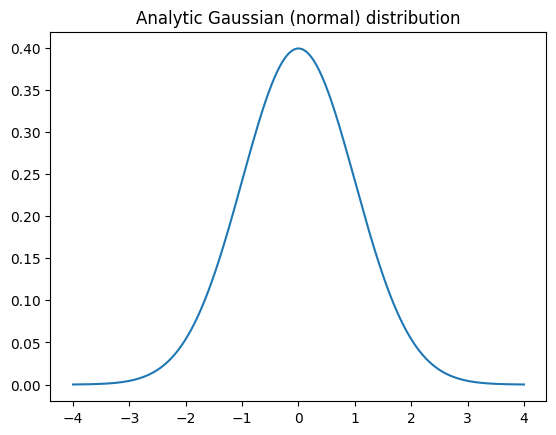

124.99221530601626


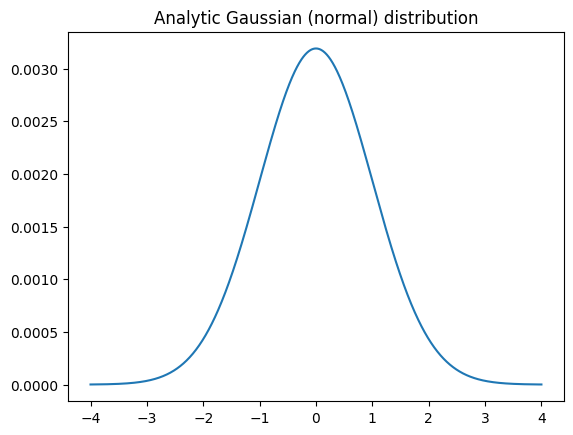

1.0
[0.99993772]


In [ ]:
## Gaussian

# number of discretizations
N = 1001

x = np.linspace(-4,4,N)
gausdist = stats.norm.pdf(x)

plt.plot(x,gausdist)
plt.title('Analytic Gaussian (normal) distribution')
plt.show()

# is this a probability distribution?
print(sum(gausdist)) # -> 124.99221530601626, 이 함수는 확률분포가 아니다
# 합이 1이 나오도록 조정 : 
plt.plot(x,gausdist / sum(gausdist))
plt.title('Analytic Gaussian (normal) distribution')
plt.show()
print(sum(gausdist)/ sum(gausdist)) # -> 1.0, 이제 확률분포가 됨
# try scaling by dx...
# 리만 합을 이용해서 확률분포로 만들기
print(sum(gausdist)* np.diff(x[:2]))



이 셀은 **정규 분포를 따르는 난수를 생성**하여 경험적인(empirical) 정규 분포를 히스토그램으로 시각화합니다.
* `stretch = 1`: 생성될 난수의 표준편차(standard deviation)를 설정합니다. (주석에는 분산이라고 되어 있지만, `np.random.randn()`은 표준편차가 1인 난수를 생성하므로, `stretch`는 표준편차에 해당합니다.)
* `shift = 5`: 생성될 난수의 평균(mean)을 설정합니다.
* `n = 1000`: 생성할 난수의 개수입니다.
* `data = stretch*np.random.randn(n) + shift`: 평균 0, 표준편차 1인 표준 정규분포를 따르는 난수 `n`개를 생성(`np.random.randn(n)`)한 뒤, 여기에 `stretch`를 곱하여 표준편차를 조절하고, `shift`를 더하여 평균을 이동시킵니다.
* `plt.hist(data,25)`: 생성된 `data`를 사용하여 히스토그램을 그립니다. `25`는 히스토그램의 막대(bin) 개수를 의미합니다. 이 히스토그램은 데이터가 실제로 정규분포와 유사한 형태를 띠는지 시각적으로 보여줍니다.
* `plt.title(...)`: 그래프 제목을 "Empirical normal distribution"으로 설정합니다.

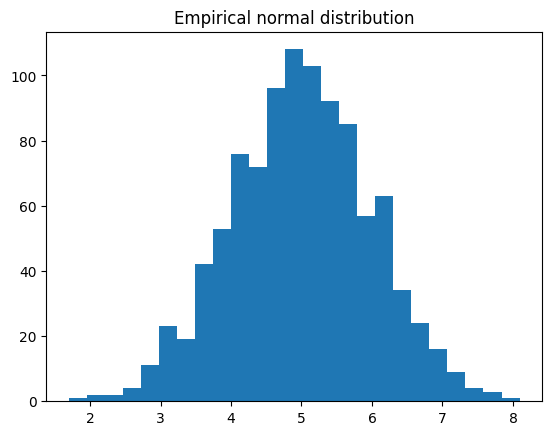

In [7]:
## Normally-distributed random numbers

# parameters
stretch = 1 # variance (square of standard deviation)
shift   = 5 # mean
n       = 1000

# create data
data = stretch*np.random.randn(n) + shift

# plot data
plt.hist(data,25)
plt.title('Empirical normal distribution')
plt.show()


이 셀은 **균등 분포(Uniform distribution)를 따르는 난수를 생성**하고 두 가지 방식으로 시각화합니다.
* `stretch = 2`: 분포의 범위(너비)를 결정합니다.
* `shift = .5`: 분포의 중심(평균)을 이동시키는 값입니다.
* `n = 10000`: 생성할 난수의 개수입니다.
* `data = stretch*np.random.rand(n) + shift-stretch/2`: `np.random.rand(n)`은 0과 1 사이의 균등 분포를 따르는 난수를 생성합니다. 이 값을 `stretch`만큼 늘리고 `shift-stretch/2`만큼 이동시켜, 결과적으로 `shift - stretch/2` 에서 `shift + stretch/2` 사이의 범위(즉, 중심이 `shift`이고 너비가 `stretch`인)를 갖는 균등 분포 데이터를 생성합니다. (여기서는 -0.5 에서 1.5 사이의 값을 가집니다.)
* `fig,ax = plt.subplots(2,1,figsize=(5,6))`: 2개의 행과 1개의 열을 가진 서브플롯(sub-plots)을 생성하여 두 개의 그래프를 한 그림 안에 표시합니다.
* `ax[0].plot(data,'.',markersize=1)`: 첫 번째 서브플롯에 생성된 데이터 값들을 점으로 표시하여 값들의 분포를 보여줍니다.
* `ax[0].set_title(...)`: 첫 번째 서브플롯의 제목을 "Uniform data values"로 설정합니다.
* `ax[1].hist(data,25)`: 두 번째 서브플롯에 데이터의 히스토그램을 그립니다. 균등 분포이므로 이상적으로는 모든 막대의 높이가 비슷하게 나타납니다.
* `ax[1].set_title(...)`: 두 번째 서브플롯의 제목을 "Uniform data histogram"으로 설정합니다.

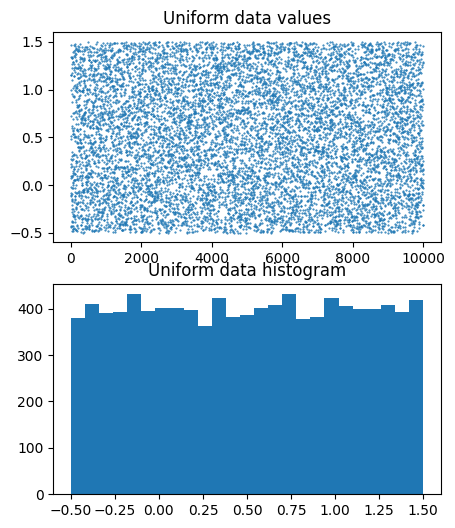

In [9]:
## Uniformly-distributed numbers

# parameters
stretch = 2 # not the variance
shift   = .5
n       = 10000

# create data
data = stretch*np.random.rand(n) + shift-stretch/2

# plot data
fig,ax = plt.subplots(2,1,figsize=(5,6))

ax[0].plot(data,'.',markersize=1)
ax[0].set_title('Uniform data values')

ax[1].hist(data,25)
ax[1].set_title('Uniform data histogram')

plt.show()


이 셀은 **이론적인(analytic) 로그-정규 분포(Log-normal distribution)**를 시각화합니다.
* `N = 1001`: x축을 얼마나 세밀하게 나눌지를 결정하는 점의 개수입니다.
* `x = np.linspace(0,10,N)`: 0부터 10까지의 구간을 `N`개의 동일한 간격으로 나눕니다. 로그-정규 분포는 양수 값만 정의됩니다.
* `lognormdist = stats.lognorm.pdf(x,1)`: `scipy.stats.lognorm.pdf()` 함수를 사용하여 `x` 배열의 각 값에 대한 로그-정규 분포의 확률 밀도 함수(PDF) 값을 계산합니다. 두 번째 인자 `1`은 분포의 모양(shape)을 결정하는 파라미터 s (또는 시그마 $\sigma$)입니다.
* `plt.plot(x,lognormdist)`: x값에 따른 PDF 값을 사용하여 로그-정규 분포 곡선을 그립니다.
* `plt.title(...)`: 그래프의 제목을 "Analytic log-normal distribution"으로 설정합니다.

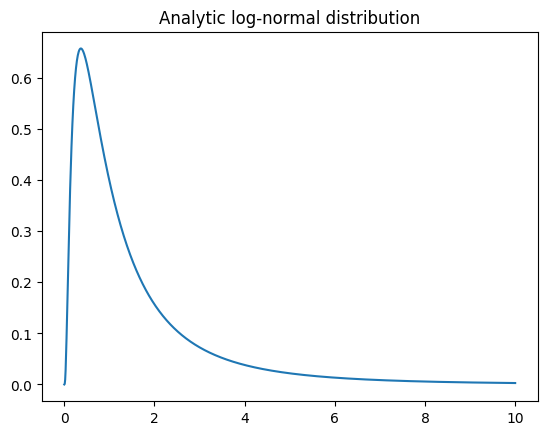

In [10]:
## log-normal distribution

N = 1001
x = np.linspace(0,10,N)
lognormdist = stats.lognorm.pdf(x,1)

plt.plot(x,lognormdist)
plt.title('Analytic log-normal distribution')
plt.show()


이 셀은 **경험적인(empirical) 로그-정규 분포를 생성**하고 시각화합니다. 로그-정규 분포는 어떤 확률변수 $X$에 대해 $\ln(X)$가 정규분포를 따를 때, $X$가 따르는 분포입니다. 반대로, $Y$가 정규분포를 따를 때 $e^Y$는 로그-정규 분포를 따릅니다.
* `shift = 5`, `stretch = .5`, `n = 2000`: 기저 정규분포의 평균, 표준편차, 그리고 생성할 데이터 포인트의 수를 설정합니다.
* `data = stretch*np.random.randn(n) + shift`: 먼저 평균이 `shift`이고 표준편차가 `stretch`인 정규 분포를 따르는 난수를 생성합니다.
* `data = np.exp(data)`: 생성된 정규 분포 데이터에 자연 지수 함수(`np.exp()`)를 적용하여 로그-정규 분포 데이터로 변환합니다.
* `fig,ax = plt.subplots(2,1,figsize=(4,6))`: 두 개의 서브플롯을 생성합니다.
* `ax[0].plot(data,'.')`: 첫 번째 서브플롯에 생성된 로그-정규 분포 데이터 값들을 점으로 표시합니다.
* `ax[1].hist(data,25)`: 두 번째 서브플롯에 데이터의 히스토그램을 그려 경험적인 로그-정규 분포의 모양(오른쪽으로 길게 치우친 꼬리)을 보여줍니다.
* `ax[0].set_title(...)`, `ax[1].set_title(...)`: 각 서브플롯의 제목을 설정합니다.

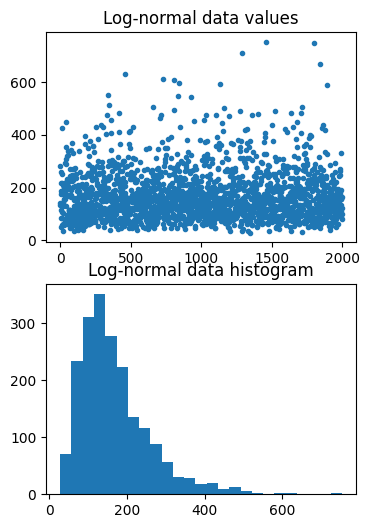

In [11]:
## empirical log-normal distribution

shift   = 5  # equal to the mean?
stretch = .5 # equal to standard deviation?
n = 2000     # number of data points

# generate data
data = stretch*np.random.randn(n) + shift
data = np.exp( data )

# plot data
fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(data,'.')
ax[0].set_title('Log-normal data values')

ax[1].hist(data,25)
ax[1].set_title('Log-normal data histogram')
plt.show()


이 셀은 **이항 분포(Binomial distribution)**를 시각화합니다. 이항 분포는 성공 확률이 `p`인 독립적인 베르누이 시행을 `n`번 반복했을 때 나타나는 성공 횟수(K)에 대한 이산 확률 분포입니다.
* `n = 10`: 총 시행 횟수 (예: 동전을 던지는 횟수)입니다.
* `p = .5`: 각 시행에서 성공할 확률 (예: 동전의 앞면이 나올 확률)입니다.
* `x = range(n+2)`: 가능한 성공 횟수(0부터 `n`까지)를 나타내는 x축 값을 생성합니다. `n+2`까지 범위를 설정한 것은 그래프 양 끝에 약간의 여유를 두기 위함입니다.
* `bindist = stats.binom.pmf(x,n,p)`: `scipy.stats.binom.pmf()` 함수를 사용하여 각 성공 횟수 `x`에 대한 확률 질량 함수(Probability Mass Function, PMF) 값을 계산합니다.
* `plt.bar(x,bindist)`: x값(성공 횟수)에 따른 PMF 값(확률)을 막대그래프로 나타냅니다. 이산 분포이므로 선 그래프 대신 막대그래프가 적합합니다.
* `plt.title(...)`: 그래프 제목에 시행 횟수 `n`과 성공 확률 `p` 값을 포함하여 설정합니다.

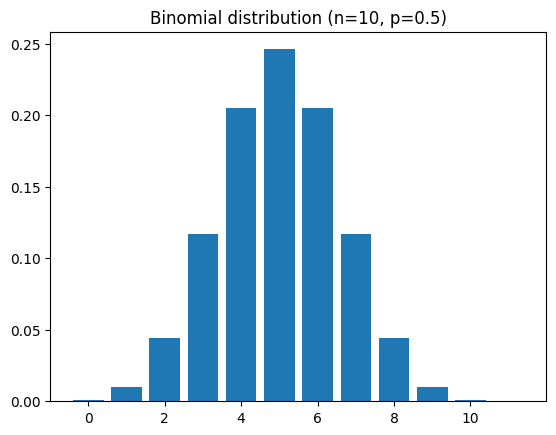

In [12]:
## binomial

# a binomial distribution is the probability of K heads in N coin tosses,
# given a probability of p heads (e.g., .5 is a fair coin).

n = 10 # number on coin tosses
p = .5 # probability of heads

x = range(n+2)
bindist = stats.binom.pmf(x,n,p)

plt.bar(x,bindist)
plt.title('Binomial distribution (n=%s, p=%g)'%(n,p))
plt.show()


이 셀은 **t-분포(Student's t-distribution)**를 시각화합니다. t-분포는 정규분포와 유사한 종 모양이지만, 표본 크기가 작을 때 또는 모집단의 표준편차를 알 수 없을 때 주로 사용되며, 꼬리가 더 두껍습니다.
* `x = np.linspace(-4,4,1001)`: t-값을 나타낼 x축의 범위를 생성합니다.
* `df = 200`: t-분포의 **자유도(degrees of freedom)**를 설정합니다. 자유도는 분포의 모양을 결정하는 중요한 파라미터로, 자유도가 커질수록 t-분포는 표준 정규분포에 근사합니다.
* `t = stats.t.pdf(x,df)`: `scipy.stats.t.pdf()` 함수를 사용하여 주어진 자유도 `df`에 대해 각 `x` (t-값)에서의 확률 밀도 함수(PDF) 값을 계산합니다.
* `plt.plot(x,t)`: 계산된 PDF 값을 사용하여 t-분포 곡선을 그립니다.
* `plt.xlabel('t-value')`, `plt.ylabel('P(t | H$_0$)')`: 각각 x축과 y축의 레이블을 설정합니다. y축 레이블 `P(t | H$_0$)`는 "귀무가설(H$_0$)이 참일 때, 해당 t-값을 관찰할 확률 밀도"를 의미합니다.
* `plt.title(...)`: 그래프 제목에 자유도 `df` 값을 포함하여 설정합니다.

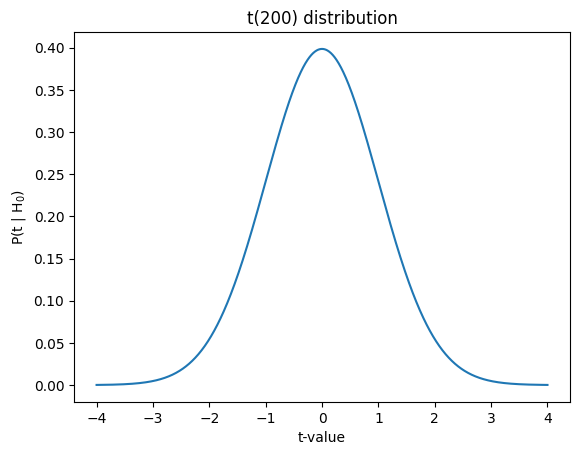

In [13]:
## t

x  = np.linspace(-4,4,1001)
df = 200
t  = stats.t.pdf(x,df)

plt.plot(x,t)
plt.xlabel('t-value')
plt.ylabel('P(t | H$_0$)')
plt.title('t(%g) distribution'%df)
plt.show()


이 셀은 **F-분포(F-distribution)**를 시각화합니다. F-분포는 두 개의 독립적인 카이제곱 분포의 비율을 따르는 분포로, 주로 분산 분석(ANOVA)에서 두 개 이상의 모평균이 동일한지 검정하거나, 두 모집단의 분산이 동일한지 검정하는 데 사용됩니다.
* `num_df = 5`: **분자 자유도(numerator degrees of freedom)**를 설정합니다.
* `den_df = 100`: **분모 자유도(denominator degrees of freedom)**를 설정합니다. F-분포는 이 두 자유도에 의해 모양이 결정됩니다.
* `x = np.linspace(0,10,10001)`: F-값을 나타낼 x축의 범위를 생성합니다. F-분포는 0보다 큰 값만 가집니다.
* `fdist = stats.f.pdf(x,num_df,den_df)`: `scipy.stats.f.pdf()` 함수를 사용하여 주어진 두 자유도(`num_df`, `den_df`)에 대해 각 `x` (F-값)에서의 확률 밀도 함수(PDF) 값을 계산합니다.
* `plt.plot(x,fdist)`: 계산된 PDF 값을 사용하여 F-분포 곡선을 그립니다. F-분포는 일반적으로 오른쪽으로 치우친(skewed to the right) 모양을 가집니다.
* `plt.title(f'F({num_df},{den_df}) distribution')`: 그래프 제목에 분자 및 분모 자유도 값을 f-string을 사용하여 표시합니다.
* `plt.xlabel('F value')`: x축 레이블을 "F value"로 설정합니다.

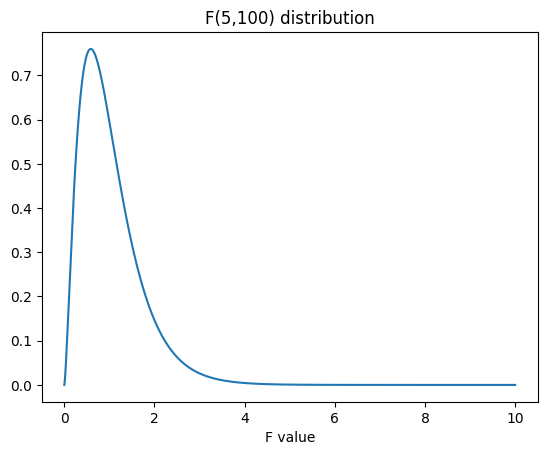

In [14]:
## F

# parameters
num_df = 5   # numerator degrees of freedom
den_df = 100 # denominator df

# values to evaluate 
x = np.linspace(0,10,10001)

# the distribution
fdist = stats.f.pdf(x,num_df,den_df)

plt.plot(x,fdist)
plt.title(f'F({num_df},{den_df}) distribution')
plt.xlabel('F value')
plt.show()